Title: Load Campaign Modeling Case Study

By: William Matthew Tyler

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Domain:
Banking/Finance

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from scipy import stats
from scipy.stats import norm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score,accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
from IPython.core.display import display, HTML
from sklearn import preprocessing
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
DF = pd.read_csv("Bank.csv")

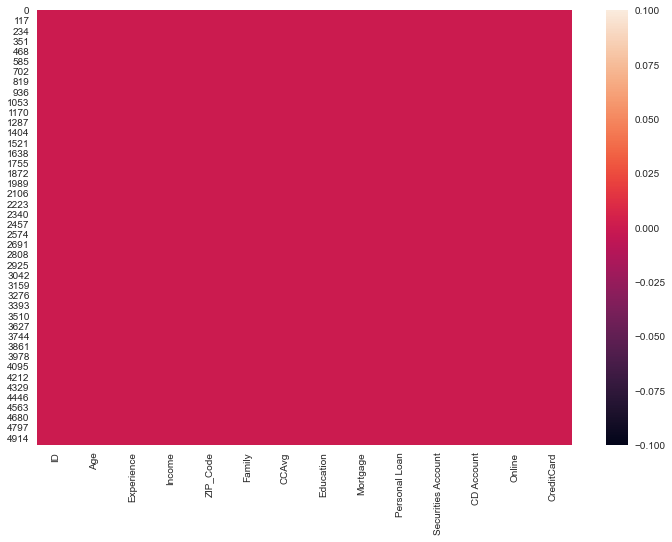

In [56]:
# Check missing values via heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(DF.isna())
plt.show()

In [57]:
DF.corr()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [58]:
DF.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP_Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [59]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [60]:
DF.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [61]:
rows_count, columns_count = DF.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 5000
Total Number of columns : 14


In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
def plot_corr(DF, size=11):
    corr = DF.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

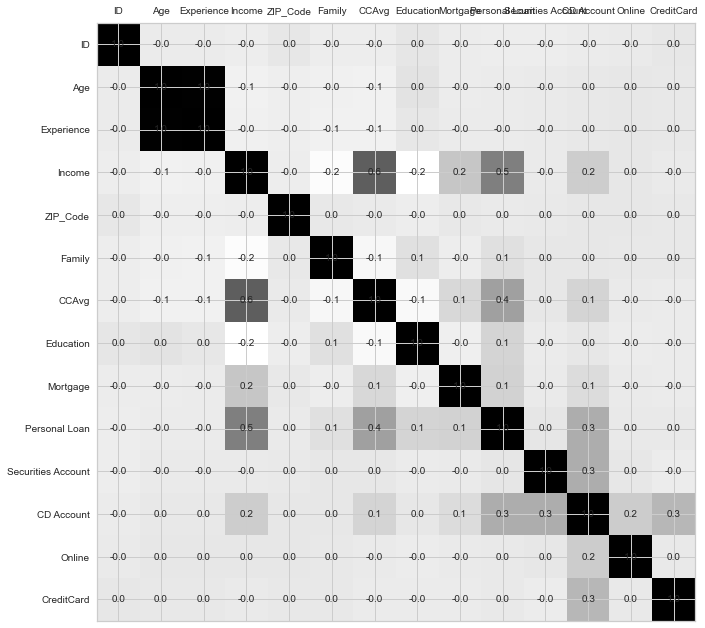

In [64]:
plot_corr(DF)

Age & experience correlated 1 to 1

In [11]:
DF.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

There are 5000 unique id, 45 unique ages, 47 different experiences, 162 different incomes, 467 unique zipcodes, 4 unique familiy sizes, 108 unique ccavg, 3 unique education, 347 different mortgages, and 2 unique personal loans, securities accounts, cd accounts, online, and credit cards.

In [12]:
print ("Number of people with zero mortgage:", (DF['Mortgage']==0).sum())
print ("Number of people with zero credit card spending per month:", (DF['CreditCard']==0).sum())

Number of people with zero mortgage: 3462
Number of people with zero credit card spending per month: 3530


In [13]:
for column in DF.columns:
     print("\n" + column)
     print(DF[column].value_counts())


ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4    

I will now Univariate the dataset

<AxesSubplot:xlabel='Online', ylabel='Density'>

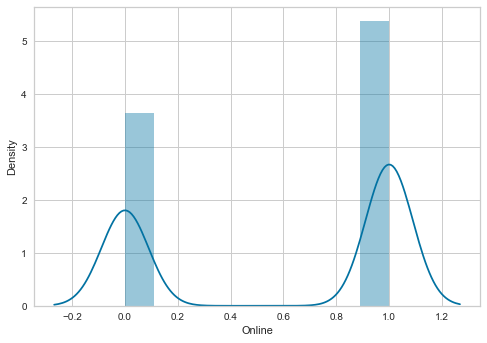

In [14]:
sns.distplot(DF['Online'])

<AxesSubplot:xlabel='Securities Account', ylabel='Density'>

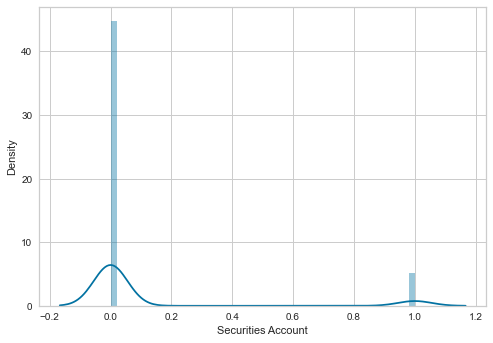

In [15]:
sns.distplot(DF['Securities Account'])

<AxesSubplot:xlabel='ID', ylabel='Density'>

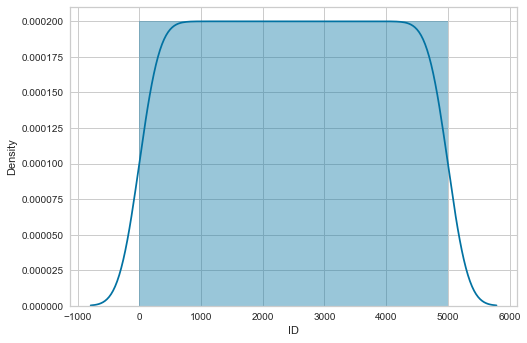

In [16]:
sns.distplot(DF['ID'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

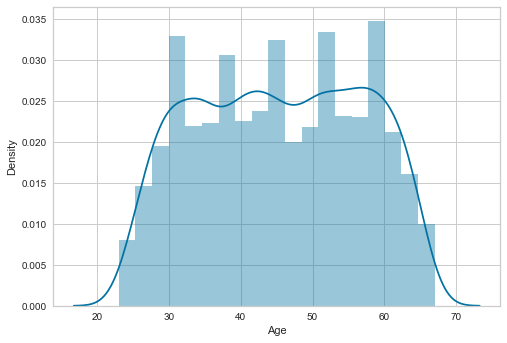

In [17]:
sns.distplot(DF['Age'])

The Mode is 35.
Min Age is 23.
Max Age is 67.

<AxesSubplot:xlabel='Experience', ylabel='Density'>

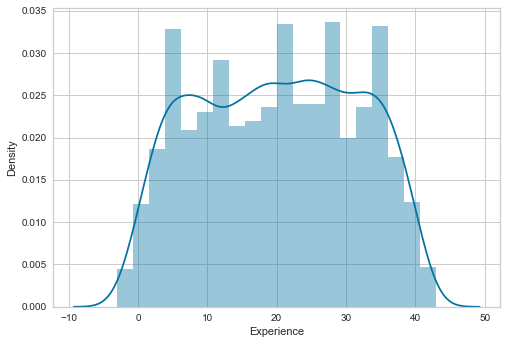

In [18]:
sns.distplot(DF['Experience'])


<AxesSubplot:xlabel='Income', ylabel='Density'>

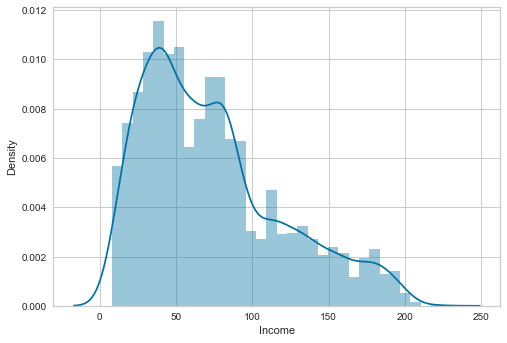

In [19]:
sns.distplot(DF['Income'])

<AxesSubplot:xlabel='ZIP_Code', ylabel='Density'>

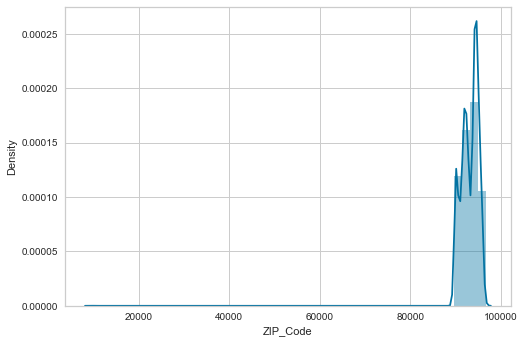

In [20]:
sns.distplot(DF['ZIP_Code'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

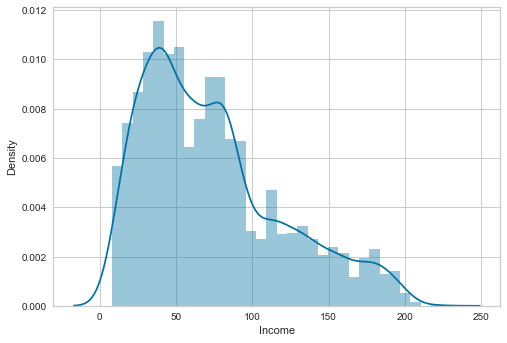

In [21]:
sns.distplot(DF['Income'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

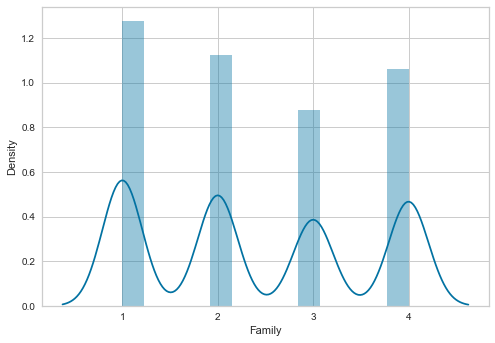

In [22]:
sns.distplot(DF['Family'])

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

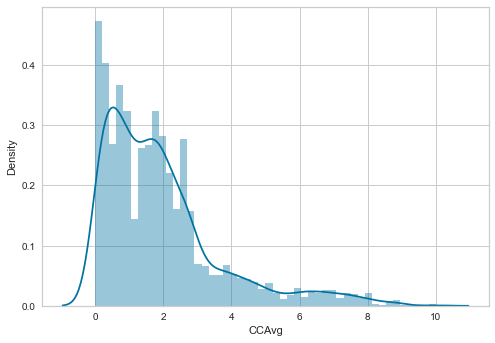

In [23]:
sns.distplot(DF['CCAvg'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

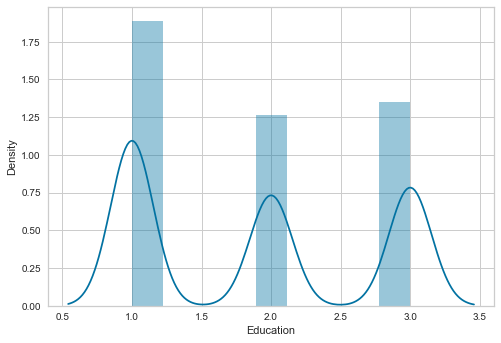

In [24]:
sns.distplot(DF['Education'])

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

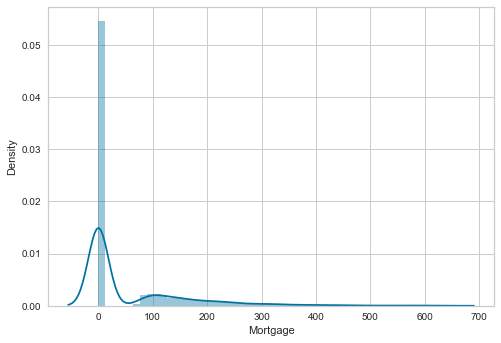

In [25]:
sns.distplot(DF['Mortgage'])

<AxesSubplot:xlabel='Personal Loan', ylabel='Density'>

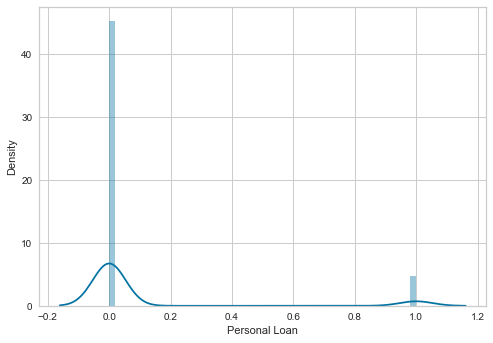

In [26]:
sns.distplot(DF['Personal Loan'])

<AxesSubplot:xlabel='CreditCard', ylabel='Density'>

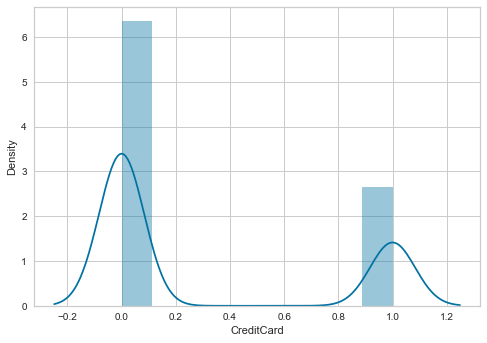

In [27]:
sns.distplot(DF['CreditCard'])

I will now Bivariate the dataset:

Hypothesis:

1: People with Undergraduate degrees will be more likely to take out a loan compared to people with graduate degrees.
2: People with no credit card usage will be less likely to take a personal loan.
3. People with CDS and Securities are less likely to take out a loan.
4. People with online banking are more likely to take out a loan.
5. people 40 and above are more likely to take out a loan.
6. People with family size 1 will be less likely to take out a loan compared to those with family size 2, 3, and 4.

In [28]:
DF["one"] = np.where(DF['Family'] == 1, 1, 0)


Personal Loan         0         1
one                              
0              0.894274  0.105726
1              0.927310  0.072690


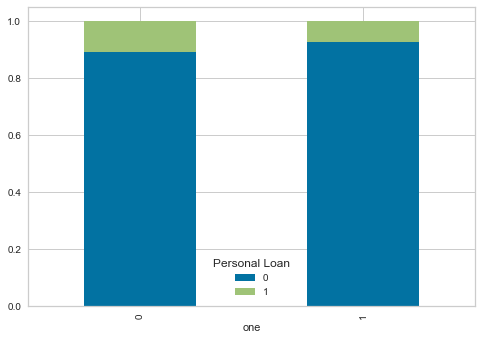

In [29]:
Fam = pd.crosstab(DF['one'], DF['Personal Loan'])
Fam.div(Fam.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(Fam.div(Fam.sum(1).astype(float),axis=0))

Family size of one is more likely to take out a loan than family size greater than one. My hypothesis was wrong.

In [30]:
DF['over40'] = np.where(DF['Age'] >= 40, 1, 0)

Personal Loan         0         1
over40                           
0              0.898559  0.101441
1              0.906891  0.093109


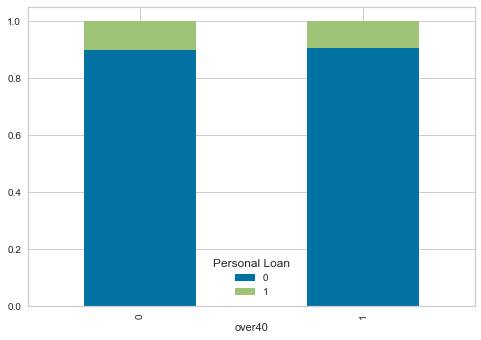

In [31]:
Age = pd.crosstab(DF['over40'], DF['Personal Loan'])
Age.div(Age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(Age.div(Age.sum(1).astype(float),axis=0))

People over 40 are more likely to take out a loan compared to those under 40 making my hypothesis correct

Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


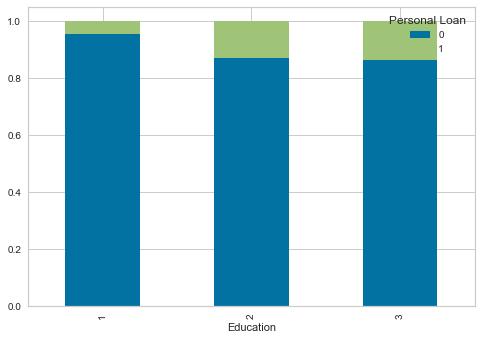

In [32]:
edu = pd.crosstab(DF['Education'], DF['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(edu.div(edu.sum(1).astype(float),axis=0))

People with undergraduate degrees are least likely of all to get a loan therefor our hypothesis was wrong. People with professional degrees are less likely to get a loan compared to those w/ grad degrees. People with grad degrees most likely of all to get a loan. 

Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


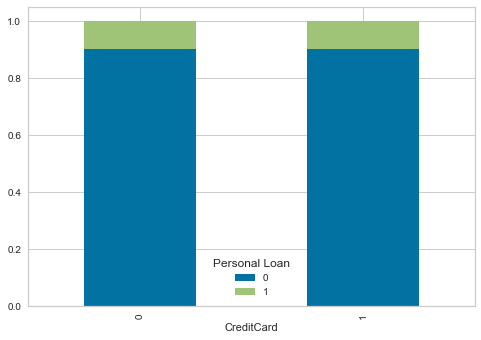

In [33]:
CC = pd.crosstab(DF['CreditCard'], DF['Personal Loan'])
CC.div(CC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(CC.div(CC.sum(1).astype(float),axis=0))

If you don't have credit card usage, you're 90.45% likely to not get a loan and 90.27% likely to not get a loan if you have credit card usage. Our hypothesis is correct by a small amount. 

Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


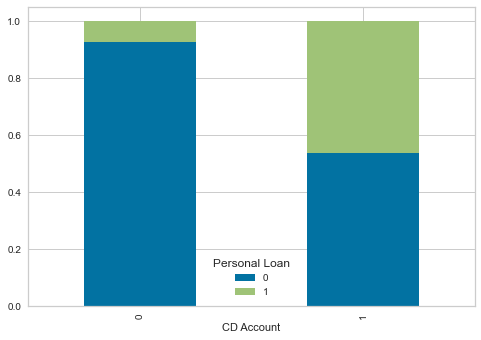

In [34]:
CD = pd.crosstab(DF['CD Account'], DF['Personal Loan'])
CD.div(CD.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(CD.div(CD.sum(1).astype(float),axis=0))

Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


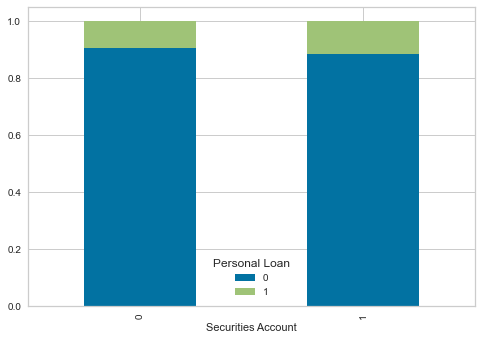

In [35]:
SEC = pd.crosstab(DF['Securities Account'], DF['Personal Loan'])
SEC.div(SEC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(SEC.div(SEC.sum(1).astype(float),axis=0))

Those with a CD account 46.35% chance of getting loan and 92.76 % chance if you don't making my hypothesis wrong.
Those with a security account are more likely to take out a loan making my hypothesis incorrect.

Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


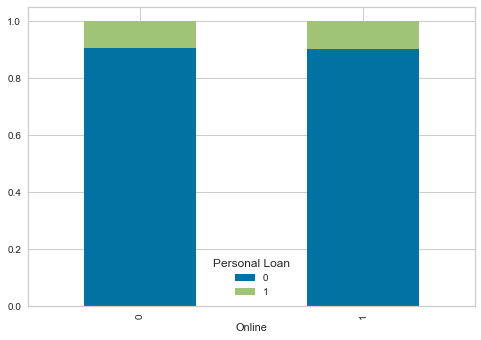

In [36]:
SEC = pd.crosstab(DF['Online'], DF['Personal Loan'])
SEC.div(SEC.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
print(SEC.div(SEC.sum(1).astype(float),axis=0))

People who use online banking services more likely to take out a loan by .4% proving my hypothesis to be correct.

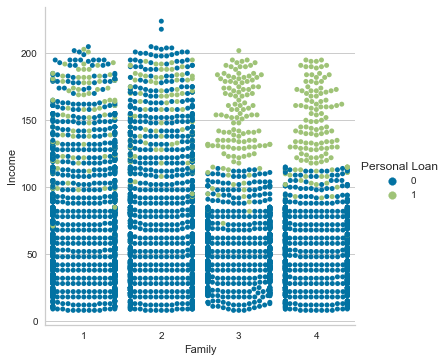

In [37]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = DF, kind='swarm')

Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

In [38]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Avg age is 45
- negative min in experience
- 59.6% use internet banking facilities
- All those surveyed have at least a undergrad degree
- Everyone has at least an income $8000 of all surveyed

In [39]:
DF.skew()


ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP_Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
one                    0.902475
over40                -0.643029
dtype: float64

Customers with credit card and income have a half normal distribution 

In [40]:
array = DF
X= array.iloc[:,0:11]
y= array.iloc[:,11]

In [41]:
X=DF.drop('Personal Loan', axis = 1)
y=DF['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
X_train.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,one,over40
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0,0,1
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0,0,0


In [42]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(DF.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(DF.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [43]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(DF.loc[DF['Personal Loan'] == 1]), (len(DF.loc[DF['Personal Loan'] == 1])/len(DF.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(DF.loc[DF['Personal Loan'] == 0]), (len(DF.loc[DF['Personal Loan'] == 0])/len(DF.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")


Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



Since The original testing data is 90.4% of the population who did not take a loan compared to less than 10% who did,this is not a good sample dataset.

In [44]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000037 -0.000576 -0.001384  0.036109 -0.000064  0.008488  0.005725   

          7         8         9        10        11        12       13  \
0  0.009229  0.000859  0.000299  0.002661 -0.000091 -0.000031 -0.00224   

         14  intercept  
0 -0.000171  -0.000059  


ID,Age, Eperience, income, zip code, family, ccavg, education, mortgage, online interaction, cd , securities, and credit card usage all range from weak negative to weak positive coefficient. 

In [45]:

X = DF.drop('Personal Loan', axis=1)
y= DF['Personal Loan'] 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)


print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.55      0.30      0.39       157

    accuracy                           0.90      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



In [46]:
DF.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,one,over40
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.294400,0.653000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.455818,0.476063
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [47]:
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

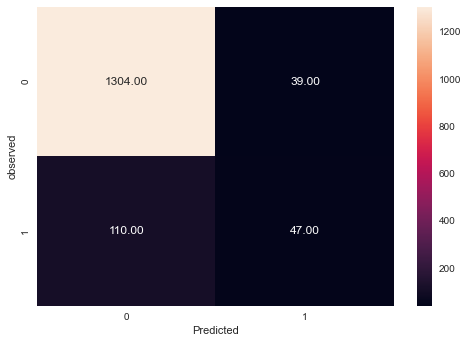

In [48]:
draw_cm(y_test, y_predicted)

In [51]:
print('Accuracy on train set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(model.score(X_test, y_test)))
print('Recall score: {:.2f}'.format(recall_score(y_test,y_predicted)))
print('ROC AUC score: {:.2f}'.format(roc_auc_score(y_test,y_predicted)))
print('Precision score: {:.2f}'.format(precision_score(y_test,y_predicted)))


Accuracy on train set: 0.91
Accuracy on test set: 0.90
Recall score: 0.30
ROC AUC score: 0.64
Precision score: 0.55


# Final Observations and Recommendations:

True Positive (observed=1,predicted=1): Model predicted that 47 customers shall take Personal loan and they customer took it
False Positive (observed=0,predicted=1): Model Predicted 39 Personal loan will take and the customer did not take it but bank didn't loose any money
True Negative (observed=0,predicted=0): Model Predicted 1304 Personal loan will not take and the customer did not take it
False Negative (observed=1,predicted=0): Model Predicted 110 Personal loan will not take and the customer took it - This is where model should have done better.


I would recommend based off of the heatmap that the categorical data is too broad. Targeting existing customers who have not taken out a loan but are in a demographic with more loan applicants would be the best option.

ID,Age, Eperience, income, zip code, family, ccavg, education, mortgage, online interaction, cd , securities, and credit card usage all range from weak negative to weak positive coefficient. Possibly creating a datavisualization with zip code and a heat map in data visualization could help. Drill down and find other variables like customer discretionary income or if customers who pay credit card on time vs late could be another comparison that would yield more result compared to those who use vs those who don't.

The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. It falls on the lower end of the pendulum. It is acceptable but not great.